## Aprendizado Não Supervisionado - Agrupamento de Dados
#### Prof. Thomas da Silva Paula

### Avaliação de Agrupamento de Dados - Demo 5

* Utilização do algoritmo K-means com parâmetros padrões.
* Base de dados Iris, muito comum para exemplos
  * Utilização de todos os atributos
* Utilização do método da Silhouetta

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

%matplotlib inline

plt.rcParams['figure.figsize'] = (14, 8)

sns.set(font_scale=2)

### Carregar a base de dados e inspecionar algumas informações

In [2]:
df = pd.read_csv('../datasets/iris/iris.data')
df.head()

,sepal length in cm,sepal width in cm,petal length in cm,petal width in cm,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
# Neste exemplo, vamos usar todas colunas
df_train = df[df.columns[:4]]
df_labels = df[df.columns[4]]

df_train.head()

,sepal length in cm,sepal width in cm,petal length in cm,petal width in cm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


### Método da Silhouette

In [4]:
%%time

min_clusters = 2
max_clusters = int(np.sqrt(len(df_train)))

clusters_range = range(min_clusters, max_clusters + 1)

silhouettes = []

for k in clusters_range:
    model = KMeans(n_clusters=k)
    model.fit(df_train)
    
    s = silhouette_score(df_train, model.labels_)
    silhouettes.append(s)

Wall time: 413 ms


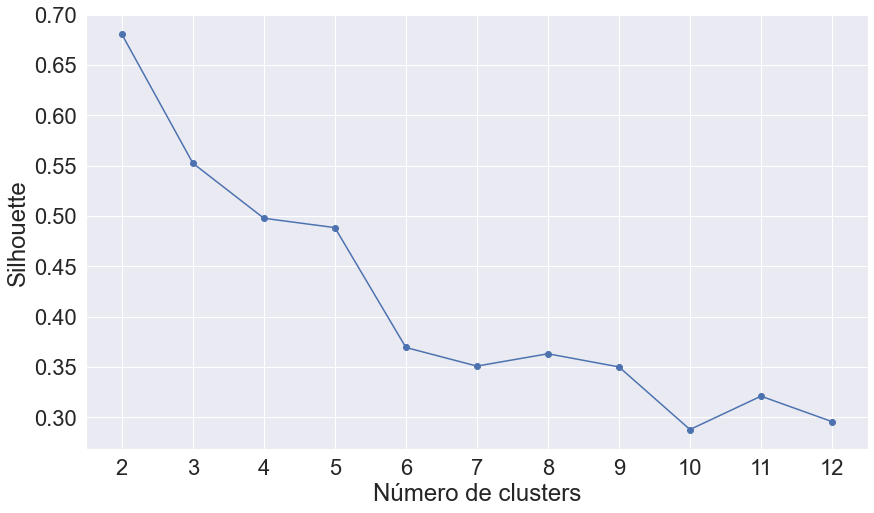

In [5]:
_ = plt.plot(clusters_range, silhouettes, '-o')
_ = plt.xlabel('Número de clusters')
_ = plt.ylabel('Silhouette')
_ = plt.xticks(clusters_range)
plt.show()